# Exploratory Data Analysis - Linear Regression

Welcome to the fourth notebook of the exploratory data analysis (EDA) series! In this notebook you will use the [World Happiness Report](https://worldhappiness.report/) dataset, that you have already seen in the Pandas tutorial notebook. The dataset consists of 2199 rows, where each row contains various hapiness-related metrics for a certain country in a given year. 

In the previous video you have learned about one of the most common applications of Maximum Likelihood Estimation (MLE), which is linear regression. Linear regression is a statistical model that is used to estimate a linear relationship between two or more variables. In case of simple linear regression you have one independent (explanatory) variable and one dependent variable (response), while in case of multiple linear regression, you have more than one explanatory variable. You can read more about linear regression on [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression).

In this notebook, you will create your own linear regression model and fit it to one and more explanatory variables to predict the response. You will use an open-source, commercially usable machine learning toolkit called [scikit-learn](https://scikit-learn.org/stable/index.html). This toolkit contains implementations of many machine learning and statistical algorithms that you can encounter as a data scientist or machine learning practitioner.

# 1. Import the Libraries
As usual, first import all the necessary libraries that you will use in the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import various functions from scikit-learn to help with the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Import functions to create interactive widgets
import ipywidgets as widgets
from ipywidgets import interact_manual, fixed

# Here are some functions that are abstracted away to not clutter the notebook too much
import utils

# 2. Import and Process the Data

You will work with the "World happiness" dataset that you have already seen in the "Introduction to Pandas" notebook. The first thing you need to do is open the notebook and clean up the data. This code will rename columns so that there are no white spaces and drop any missing values.

In [2]:
# Open the notebook
df = pd.read_csv('data/world_happiness.csv')

# Rename the column names so they dont contain spaces
df = df.rename(columns={i: "_".join(i.split(" ")).lower() for i in df.columns})

# Drop all of the rows which contain empty values. These will not be good for fitting.
df = df.dropna()

# Show the dataframe
df.head()

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


Have a closer look at the output of the cell above. The dataset consists of the following columns:

- `country_name`: Name of the country where the data was taken.


- `year`: The year when data was taken.


- `life_ladder`: The average of the estimates of life quality on a scale of 1 to 10 as given by a survey. In the survey people subjectively estimate the quality of their own life.


- `log_gdp_per_capita`: Logarithm of gross domestic product (log GDP) in purchasing power parity (PPP).


- `social_support`: National avarage of responses to the binary question: "If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?".


- `healthy_life_expectancy_at_birth`: Life expectancy at birth.


- `freedom_to_make_life_choices`: National avarage to the binary question: "Are you satisfied or dissatisfied with your freedom to choose what you do with your life?".


- `generosity`: Derived from answering the question: "Have you donated money to a charity in the past month?" and GDP.


- `perceptions_of_corruption`: Average of responses to questions about corruption.


- `positive_affect`: Average of answers to three positive affect questions, covering laugh, enjoyment and doing interesting things


- `negative_affect`: Average of answers to three negative affect questions, covering worry, sadness and anger.


Detailed explanations of the columns in the data can be found [here](https://happiness-report.s3.amazonaws.com/2023/WHR+23_Statistical_Appendix.pdf).

# 3. Inspect the Data

Before you jump into fitting the linear regression model to your data, it makes sense to visualize it to get the feeling of what you are dealing with. The Seaborn `pairplot` is a very useful function that automatically plots the scatter plots between each pair of columns in the dataframe, as well as histograms of the values in each column. Run the cell below to visualize the data.

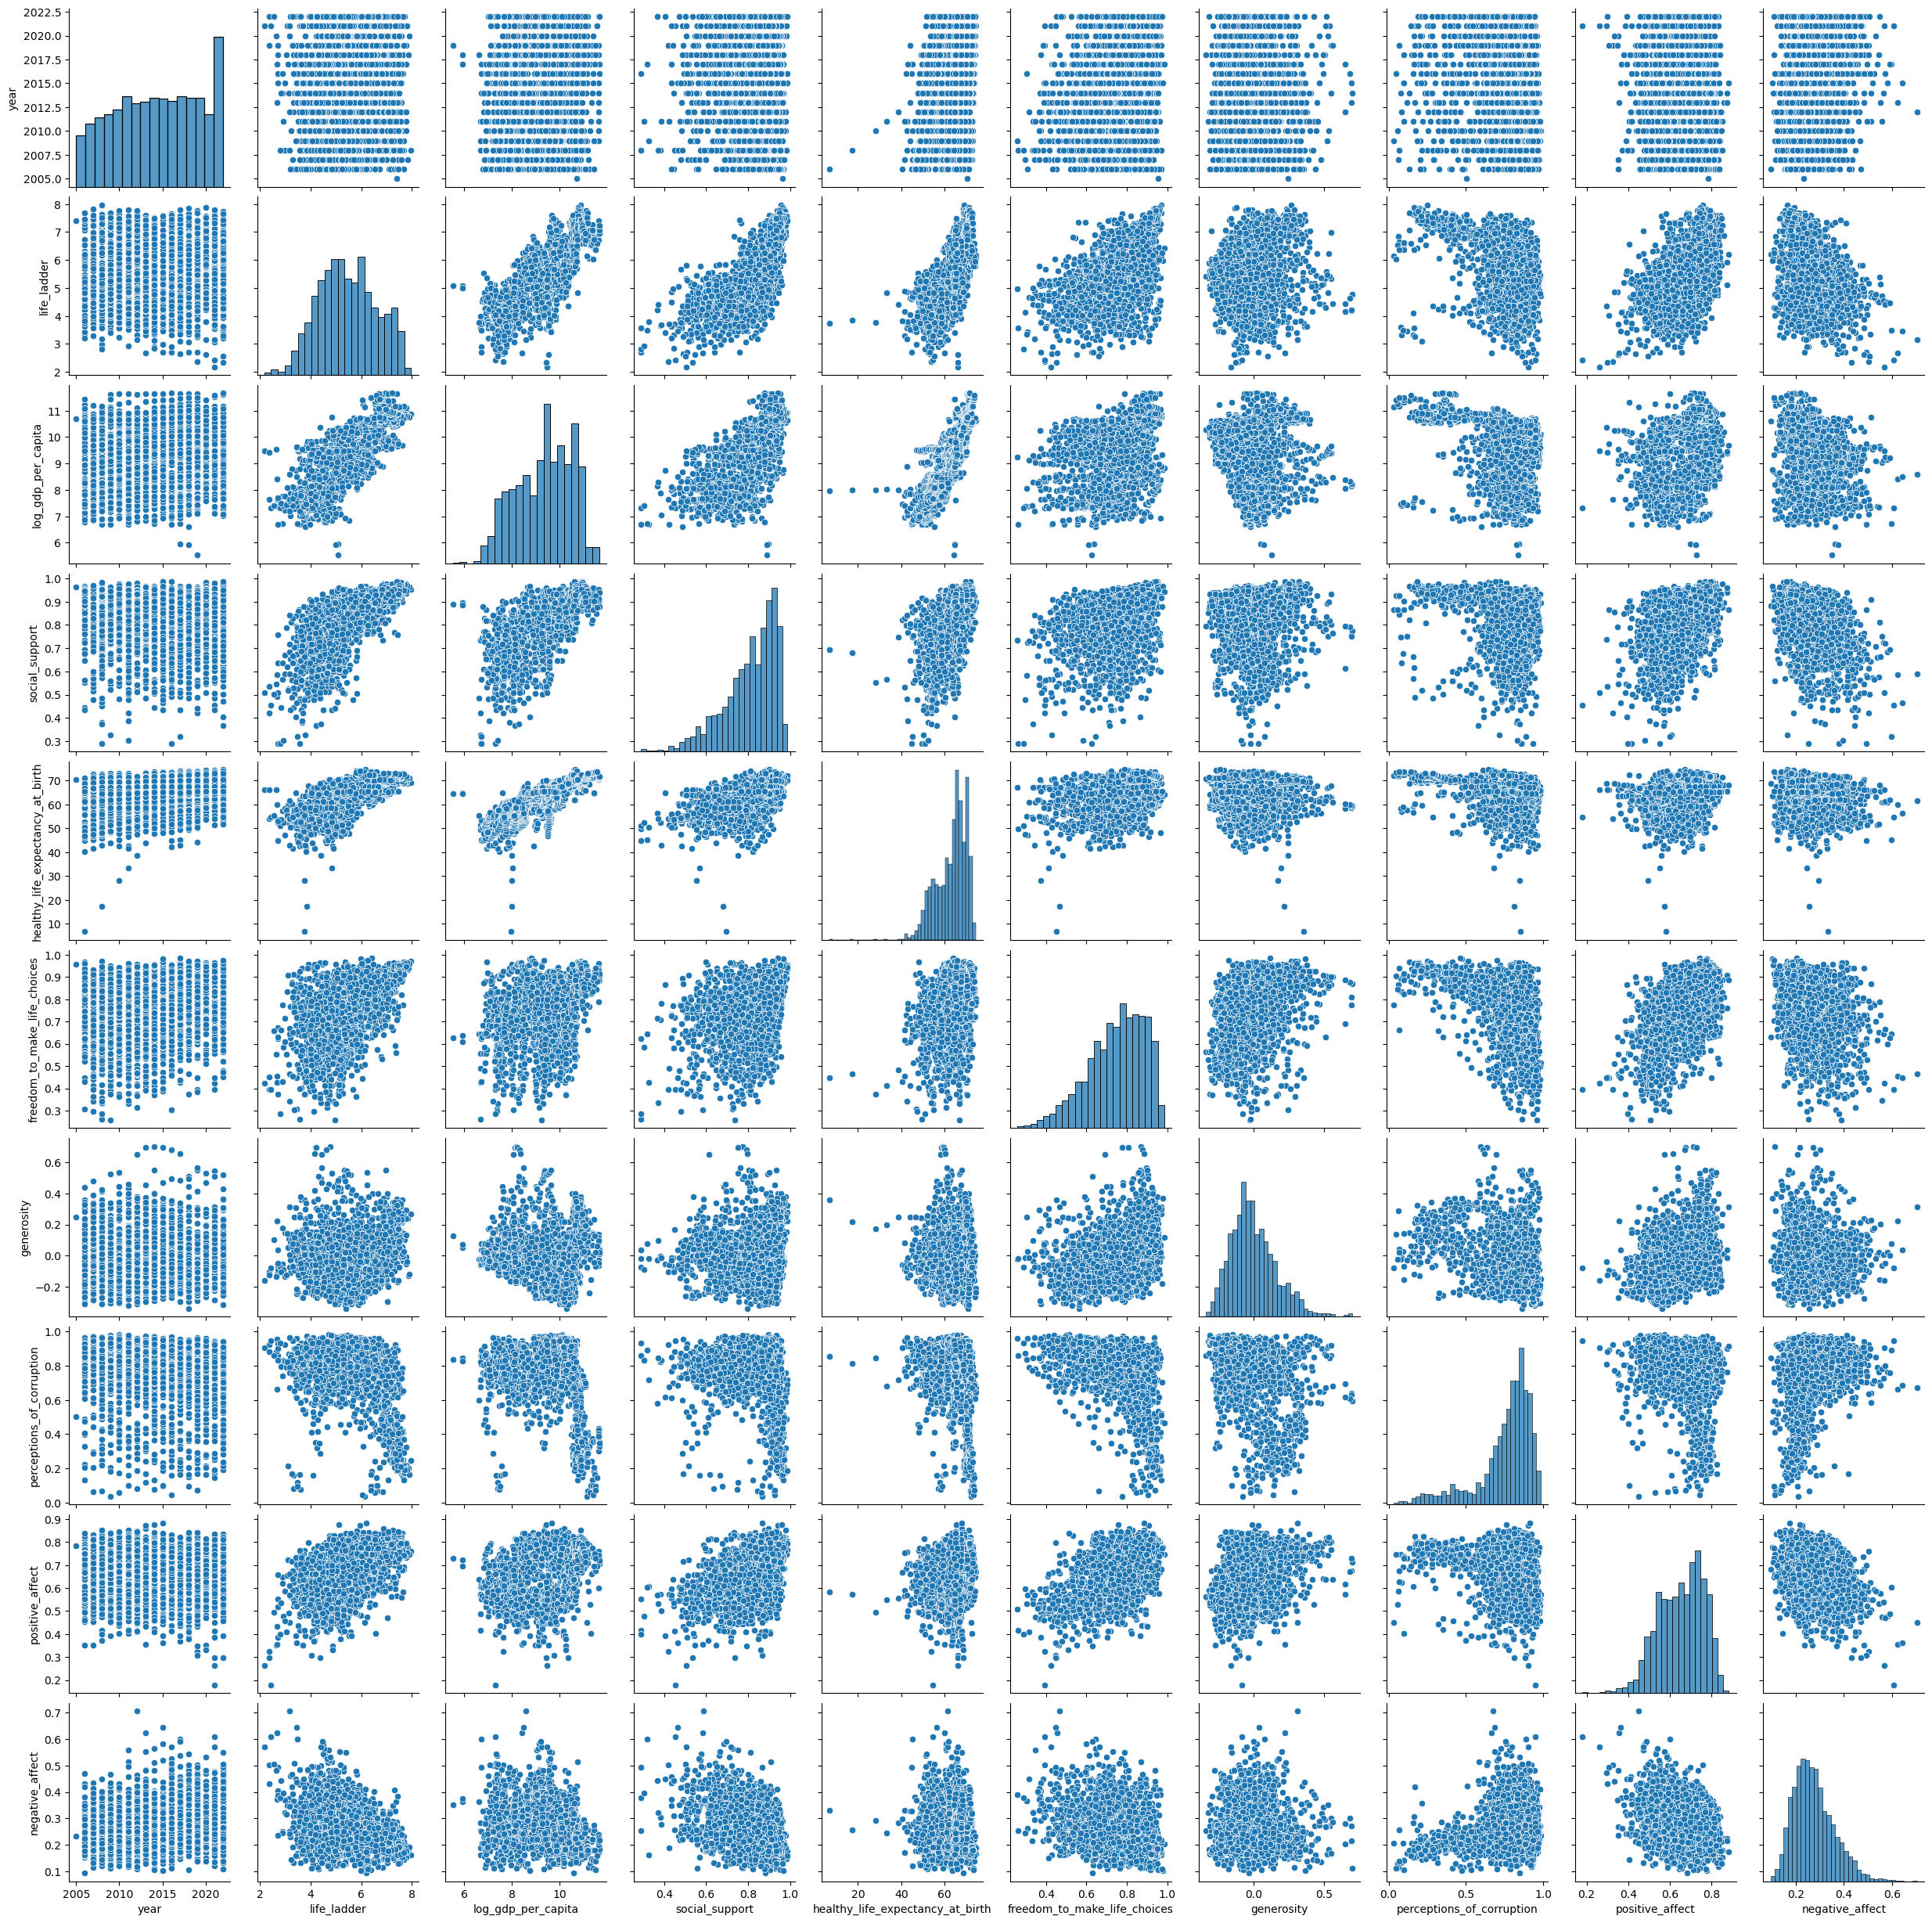

In [3]:
# If the plot doesn’t render, first try re-running this cell. If that doesn’t work, 
# you can restart the kernel (from the Kernel menu above) and try running the notebook again
sns.pairplot(df)

You can see that some of the scatter plots seem quite elongated and might show some significant correlation between the two variables. These pairs may be good candidates for independent-dependent variable pairs. But just looking at the points can be dangerous. You need to have an idea of what you would like to predict and which variables may be a good choice for explanatory variables. Take another look at the column names and think about which ones you would use as explanatory variables and what you would want to predict given this dataset. You can also get some ideas from the [official report](https://happiness-report.s3.amazonaws.com/2023/WHR+23.pdf).

# 4. Simple Linear Regression

Now that you have a good sense of the data, you can choose your independent (X) and dependent (y) variable. Let's start with the obvious ones: use the GDP per capita to explain the value on the life ladder, which measures the happiness of the people.

## 4.1 Define the Variables

In machine learning you would typically not use the same data to train and evaluate your model and that is because you want to know how well the model generalizes to new (previously unseen) data. You can run the cell below to split your data into two groups. It will create the training data, `X_train` and `y_train`, as well as the test data, `X_test` and `y_test`.  Note the uppercase X and lowercase y. This is to emphasize that the X variable is two dimensional, while the y variable is one dimensional. This is for better generalization for when you in fact use more than one explanatory variable. You will see this in action later, using more variables for predicting the happiness.

In [4]:
# Get the data from the dataframe.
X = df[['log_gdp_per_capita']]
y = df['life_ladder']

# Create the train-test split
# Note the test_size=0.2. This means you will use 20% of the data in your test set.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Show how X_train and y_train look like
print(f"Independent (X) variable:\n{X_train.values}\n")
print(f"Dependent (y) variable:\n{y_train.values}")

Independent (X) variable:
[[ 9.884]
 [10.594]
 [ 8.521]
 ...
 [10.635]
 [10.424]
 [10.006]]

Dependent (y) variable:
[5.383 6.027 4.483 ... 6.199 6.183 6.174]


## 4.2 Create and Fit the Linear Regression Model

Now that you have your train and test data, it is time to create your linear regression model. This is actually very simple and can be done in a single line using `LinearRegression` as shown below.

In [5]:
lr = LinearRegression().fit(X_train, y_train)

The first part of the statement, `LinearRegression()`, is instantiating a linear regression model. You could also set some parameters to this function. The `fit(X_train, y_train)` method is then performing the actual trainingof the model, fitting its parameters to your training data. 

## 4.3 View Parameters

You can write down the equation for the line that you fit to the data as $\hat{y}=Wx+b$, where $x$ is the explanatory variable (or variables) and $\hat{y}$ is your response, while $W$ and $b$ are the parameters that you fit. In the cell below, you can see how to access the parameters $W$ and $b$ of the model you just trained.

In [6]:
b = lr.intercept_
w = lr.coef_
print(f"Model parameters:\nw: {w},\nb: {b}")

Model parameters:
w: [0.77816718],
b: -1.8135023793672875


## 4.4 Make Predictions and Evaluate the Model

now that you have fit your model, it's time to start using it. In machine learning, a model like this is used not only to describe the data that you already have, but more importantly to create predictions based on new datapoints. To assess how well the model works, you have already split the dataset into the train and test sets, so that you can evaluate how the model performs on previously unseen data.

The default way to calculate the predictions on the test set is to use `.predict()`. You will use `.predict()` on the whole test set at once. To reinforce how the model actually works, you will compare the predictions given by `.predict()` with ones calculated "by hand", using the parameters W and b that you extracted in the previous cell.

In [7]:
# Make a prediction using lr.predict()
y_test_preds = lr.predict(X_test)

# Make a prediction by hand using w, b.
y_pred = np.dot(X_test, w) + b

# Check whether both results are the same
print(f"prediction using np.dot() and predictions using lr.predict are the same: {(y_pred == y_test_preds).all()}\n")

# Compare some of the predictions with actual (target) values.
print(f"Last four predictions on the test set:\n{y_pred[:4]}\n" )
print(f"Target values \n{y_test[:4].values}\n")

mae = metrics.mean_absolute_error(y_test, y_test_preds)
print(f"Mean Absolute Error on the test set: {mae:.2f}")

prediction using np.dot() and predictions using lr.predict are the same: True

Last four predictions on the test set:
[4.14336741 6.53934416 6.30511584 4.80247501]

Target values 
[4.016 7.393 6.5   4.51 ]

Mean Absolute Error on the test set: 0.57


The results show that at least for the last four rows, the predictions were reasonably close to correct. The average absolute error across the test set is also 0.57 which seems to suggest that while the model can't perfectly predict happiness, it gives a pretty good approximation.

## 4.5 Plot Results
Now you can plot the predictions together with the training data to get a visual feeling of how the model performs. The blue points on the plot are real data from the training set. The orange points on the plot have their x value taken from the test set, but their y value is a prediction created by the model.

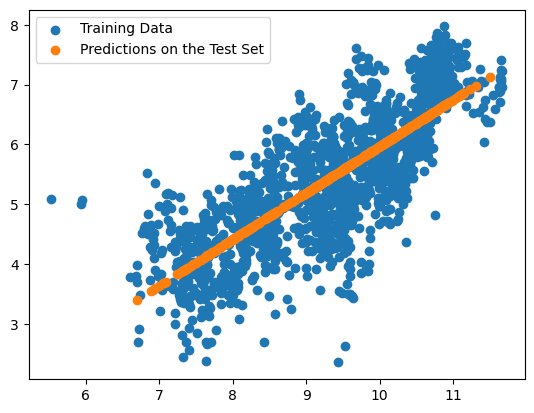

In [8]:
plt.figure()
plt.scatter(X_train, y_train, label = 'Training Data')
plt.scatter(X_test, y_pred, label = 'Predictions on the Test Set')
plt.legend()

You can see that all of the predictions lie on a straight line that fits the data best. The data, however, has a lot more variation and is not perfectly explained just by this one line. As you know there are many more variables in this dataset and some other variables may be able to explain this variation. You will see how this plays out using multiple linear regression in the next section.

# 4. Multiple Linear Regression

Often there is more than just one variable that explains the behavior of other variables. In this case you can use multiple linear regression. In the cell below there is a function defined to make your life easier:

- `fit_and_plot_linear_model`: This function is very similar to the work you already did above. The key difference is that it can take more than one feature at a time, so you will be able to experiment with building models with two or more explanatory variables. In addition it calculates the feature importance. We will not go into detail about it here, but all you need to know is that importance score tells you the relative importance of explanatory variables. The higher the score, the more important the variable is in predicting the outcome.


Check out the code in the cell below if you want to understand better what is happening. Note that the plotting and feature importance has been abstracted away to the `utils` file, so that it doesnt add unnecessary clutter the code.

In [9]:
def fit_and_plot_linear_model(data, features):
    
    # Create a list of features you want to use as explanatory variables
    features = list(features)
    
    # Create the linear regression model
    
    # Select the data
    y = data['life_ladder']
    X = data[features]
    # Create a train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    # Fit the linear regression model
    lr = LinearRegression().fit(X_train, y_train)

    # Calculate the feature imporance
    most_important, feature_importance_df = utils.calculate_feature_importance(features, lr, X_test, y_test)

    # Prepare the data for plotting
    X_plot = data[most_important]
    Y_real = data["life_ladder"]
    X_test_plot = X_test[most_important]
    y_test_preds = lr.predict(X_test)
    
    # Plot the data and the model
    utils.plot_happiness(most_important, X_plot, Y_real, X_test_plot, y_test_preds)

    # Create a plot of feature imporance if there is more than one feature
    if feature_importance_df is not None:
        utils.plot_feature_importance(feature_importance_df)
    
    # Calculate and print out the mean absolute error
    mae = metrics.mean_absolute_error(y_test, y_test_preds)
    print(f"Mean Absolute Error: {mae:.2f}\n")

Now that you have your functions defined, it is time to run them. The cell below does that in an interactive way using `widgets` and `interact_manual`. This allows you to run the function many times without typing anything in but rather changing parameters using the widgets.

In the first line of code you define all of the possible predictor variables and the rest of the code takes care for interactively running the functions. After running the cell below you can select one or more predictors from the list to perform linear regression. 

The function will calculate the linear regression and plot the data and the results on a 2D plot. For the x-axis it will automatically choose the variable with the highest feature importance score.

**Intrustions to use the widget**
- To select different variables from the menu just do ```Ctrl+click``` on the variables you want to select. Single click will only consider the variable you are clicking on. 
- To select consecutive variables you can also click on the first variable you want and ```Shift+click``` on the last one you want. This will select all variable in between. You can also click on the first one and select with ```Shift+down arrow```.

In [10]:
# List of all possible predictor variables
predictors = ['year', 'log_gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'positive_affect', 'negative_affect']

# Widget for feature selection
feature_selection = widgets.SelectMultiple(
    options=predictors, value=predictors,
    description="Features", disabled=False,
)

# Interactive call to the function
interact_manual(fit_and_plot_linear_model, data=fixed(df), features=feature_selection);

interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3, 4, 5, 6, 7, 8), options=('year…

You see that when you select more explanatory variables, the points do not lie on a straight line in 2D anymore. This is because another variable (which is not on the 2D plot) contributes to the move away from the line. In a higher dimensional space, the points still lie on a straight line.

**Congratulations on finishing this lab.** If you understand what is happening above, you are well suited to perform linear regression with scikit-learn. Later in this course you will see linear regression again using another Python library.